In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
#import the data
ChurnDatadf=pd.read_csv("churndata.csv")

In [82]:
#Show the features ( —columns) and the data in the dataframe
ChurnDatadf.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1
1,1,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,2
2,2,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,2
3,3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,3
4,4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0


In [83]:
#Get a summary on the dataframe including datatypes and shape.
ChurnDatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7032 non-null   int64  
 1   gender                     7032 non-null   object 
 2   SeniorCitizen              7032 non-null   int64  
 3   Partner                    7032 non-null   object 
 4   Dependents                 7032 non-null   object 
 5   tenure                     7032 non-null   float64
 6   PhoneService               7032 non-null   object 
 7   MultipleLines              7032 non-null   object 
 8   InternetService            7032 non-null   object 
 9   OnlineSecurity             7032 non-null   object 
 10  OnlineBackup               7032 non-null   object 
 11  DeviceProtection           7032 non-null   object 
 12  TechSupport                7032 non-null   object 
 13  StreamingTV                7032 non-null   objec

In [84]:
#Get info about numerical data
ChurnDatadf.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Number_AdditionalServices
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,32.421786,64.798208,2283.300441,2.038111
std,2032.832448,0.368844,24.545260,30.085974,2266.771362,1.847161
min,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000
25%,1762.750000,0.000000,9.000000,35.587500,401.450000,0.000000
50%,3521.500000,0.000000,29.000000,70.350000,1397.475000,2.000000
75%,5282.250000,0.000000,55.000000,89.862500,3794.737500,3.000000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000,6.000000


In [85]:
#Gat unique values for every column
for i in ChurnDatadf.columns:
    print(f"Unique {i}'s count: {ChurnDatadf[i].nunique()}")
    print(f"{ChurnDatadf[i].unique()}\n")

Unique Unnamed: 0's count: 7032
[   0    1    2 ... 7040 7041 7042]

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 72
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']



In [86]:
#Changing the data tyoe of "totalCharges" and 'tenure" to float. 
ChurnDatadf['TotalCharges'] = pd.to_numeric(ChurnDatadf['TotalCharges'], errors='coerce') 
def feature_to_float(feature_list, ChurnDatadf):
    for i in feature_list: 
        ChurnDatadf[i] = ChurnDatadf[i].astype(float) 
    return ChurnDatadf 
feature_to_float(['tenure'], ChurnDatadf) 

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1
1,1,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,2
2,2,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,2
3,3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,3
4,4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed Check,84.80,1990.50,No,5
7028,7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit Card,103.20,7362.90,No,4
7029,7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No,1
7030,7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed Check,74.40,306.60,Yes,0


In [87]:
#Renaming the data values of "PoymentMethod" for better readability.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer',
                  'Credit card (automatic)': 'Credit Card'}
ChurnDatadf["PaymentMethod"].replace(payment_column, inplace=True) 

In [88]:
#Checking the data types for any unintended data types.
ChurnDatadf.dtypes 

Unnamed: 0                     int64
gender                        object
SeniorCitizen                  int64
Partner                       object
Dependents                    object
tenure                       float64
PhoneService                  object
MultipleLines                 object
InternetService               object
OnlineSecurity                object
OnlineBackup                  object
DeviceProtection              object
TechSupport                   object
StreamingTV                   object
StreamingMovies               object
Contract                      object
PaperlessBilling              object
PaymentMethod                 object
MonthlyCharges               float64
TotalCharges                 float64
Churn                         object
Number_AdditionalServices      int64
dtype: object

In [89]:
#Counting the number of missing votues. 
ChurnDatadf.isna().sum() 

Unnamed: 0                   0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             0
PaymentMethod                0
MonthlyCharges               0
TotalCharges                 0
Churn                        0
Number_AdditionalServices    0
dtype: int64

The above shows 11 missing values for “TotalCharges”. The respective data entries will be deleted for simplicity.

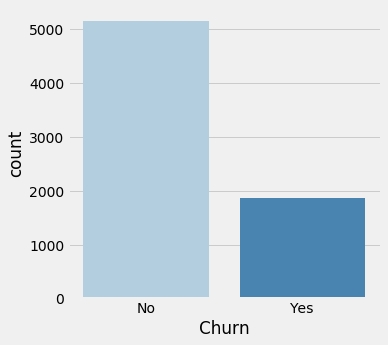

In [90]:
#AppLy the Fivethirtyeight style to all plots. 
plt.style.use("fivethirtyeight") 
#DispLoy a frequency distribution for churn. 
plt.figure(figsize=(5, 5)) 
ax = sns.countplot(x=ChurnDatadf['Churn'], palette="Blues", linewidth=1) 
plt.show() 

The plot shows a class imbalance of the data between churners and non-churners. 

In [91]:
#Create a function to generate boxptots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 
         6: [231, 232, 233, 234, 235, 236]} 
def boxplot(x, y, ChurnDatadf): 
    rows = int(str(plots[len(y)][0])[0]) 
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows)) 
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i]) 
        ax = sns.boxplot(x=x, y=j, data=ChurnDatadf[[x, j]], palette="Blues", linewidth=1) 
        ax.set_title(j) 
    
    return plt.show() 

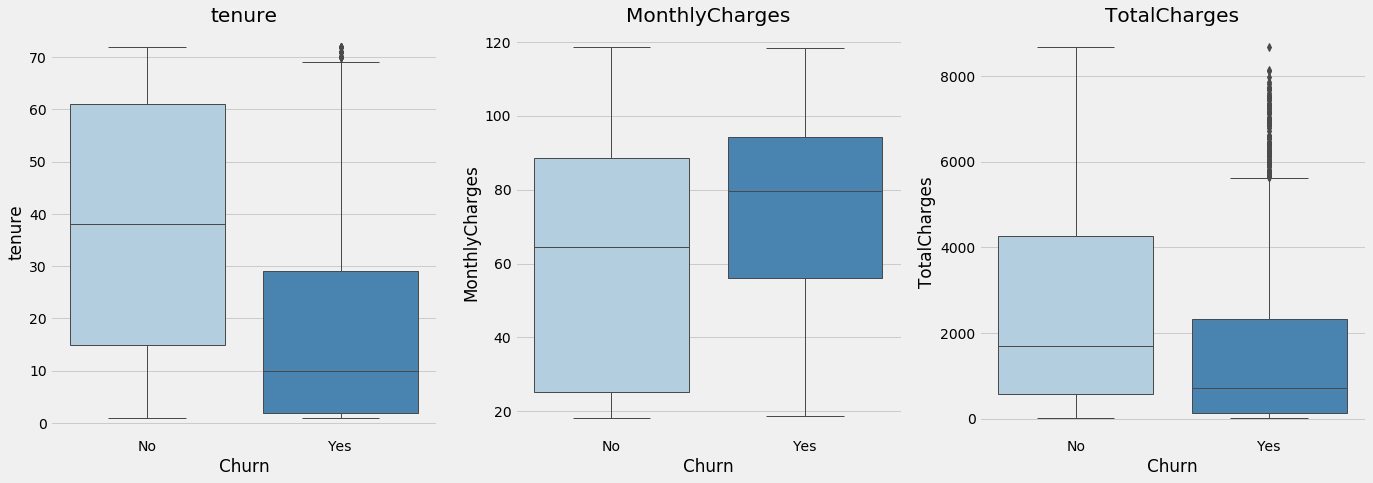

In [92]:
#Generate boxptots for tenure, MonthLyChorges and TotalCharges. 
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], ChurnDatadf) 

The above box plots show that
Churning customers have much lower tenure with a median of 10 months compared to a median of non-churners of 38 months.
Churning customers have higher monthly charges with a median of 80 USD and much lower interquartile range compared to that of non-churners (median of 65 USD).

In [93]:
#Create a function to generate countpLots: 
def countplot(x, y, ChurnDatadf): 
    rows = int(str(plots[len(y)][0])[0]) 
    columns = int(str(plots[len(y)][0])[1]) 
    plt.figure(figsize=(7*columns, 7*rows)) 
    
    for i, j in enumerate(y): 
        plt.subplot(plots[len(y)][i]) 
        ax = sns.countplot(x=j, hue=x, data=ChurnDatadf, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
                                                         
    return plt.show() 

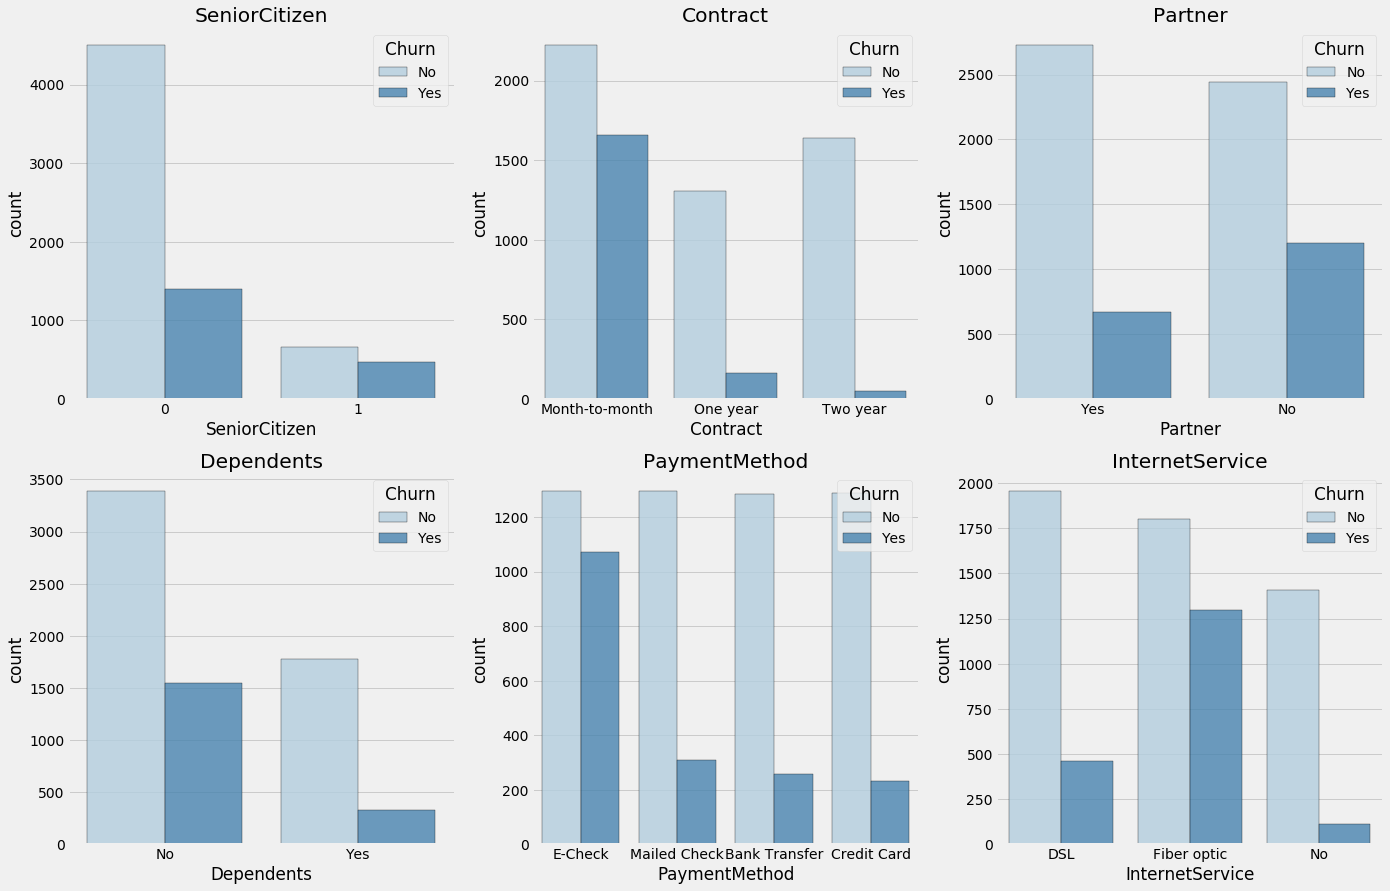

In [94]:
#Generate countpLots for various features. 
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], ChurnDatadf) 

The above plots indicate that:
Senior citizens churn rate is much higher than non-senior churn rate.
Churn rate for month-to-month contracts much higher that for other contract durations.
Moderately higher churn rate for customers without partners.
Much higher churn rate for customers without children.
Payment method electronic check shows much higher churn rate than other payment methods.
Customers with InternetService fiber optic as part of their contract have much higher churn rate.

In [95]:
#Check of outliers by appLying the IQR method checking if vaLues are way outside the IQR borders. 
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"] 
ChurnDatadf_num = ChurnDatadf[numerical_features] 
ChurnDatadf_num.describe() 
Q1 = ChurnDatadf_num.quantile(0.25)
Q3 = ChurnDatadf_num.quantile(0.75)
IQR = Q3 - Q1 
IQR
((ChurnDatadf_num < (Q1 - 1.5 * IQR)) | (ChurnDatadf_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method 

In [96]:
#Drop the rows with missing values.
ChurnDatadf = ChurnDatadf.dropna()

In [97]:
#Drop customerID feature.
ChurnDatadf = ChurnDatadf.drop(columns='customerID') 

KeyError: "['customerID'] not found in axis"

In [98]:
#Generate new feature "Number_AdditionaLServices" by summing up the number of add-on services consumed.
ChurnDatadf['Number_AdditionalServices'] = (ChurnDatadf[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
                                                         'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1) 

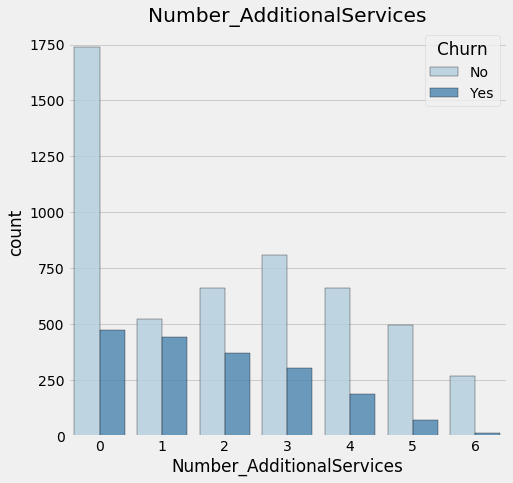

In [99]:
#Generate countpLot for the new feature.
countplot('Churn', ['Number_AdditionalServices'], ChurnDatadf)

Plot analysis:
The countplot shows a very high churn rate for customers that have 1 additional service.
Customers with a very high number of additional services do have a low churn rate.

In [100]:
ChurnDatadf.to_csv("ChurnDataUpdated.csv")

In [54]:
#LobeL encoding for identified columns. 
features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'] 
def label_encoding(features, ChurnDatadf): 
    for i in features: 
        ChurnDatadf[i] = ChurnDatadf[i].map({'Yes': 1, 'No': 0}) 
    return 
label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], ChurnDatadf) 
ChurnDatadf['gender'] = ChurnDatadf['gender'].map({'Female': 1, 'Male': 0}) 

Label encoding: The following features are categorical and each take on 2 values (mostly yes/no) — therefore are transformed to binary integers:
gender,
Partner,
Dependents,
Churn,
PhoneService,
PaperlessBilling.

In [55]:
#One-Hot-Encoding for identified coLumns. 
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices'] 
ChurnDatadf = pd.get_dummies(ChurnDatadf, columns=features_ohe) 

One-Hot Encoding: The following features are categorical, yet not ordinal (no ranking) but take on more than 2 values. For each value, a new variable is created with a binary integer indicating if the value occured in a data entry or not (1 or 0): 
MultipleLines,
InternetService,
OnlineSecurity,
OnlineBackup,
DeviceProtection,
TechSupport,
StreamingTV,
StreamingMovies,
Contract,
PaymentMethod.

In [56]:
#Min-Max-ScoLing for identified coLumns. 
from sklearn.preprocessing import MinMaxScaler 
features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges'] 
ChurnDatadf_features_mms = pd.DataFrame(ChurnDatadf, columns=features_mms) 
ChurnDatadf_remaining_features = ChurnDatadf.drop(columns=features_mms) 

mms = MinMaxScaler() 
rescaled_features = mms.fit_transform(ChurnDatadf_features_mms) 
ChurnDatadf_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=ChurnDatadf_remaining_features.index) 

ChurnDatadf = pd.concat([ChurnDatadf_remaining_features, ChurnDatadf_rescaled_features], axis=1) 

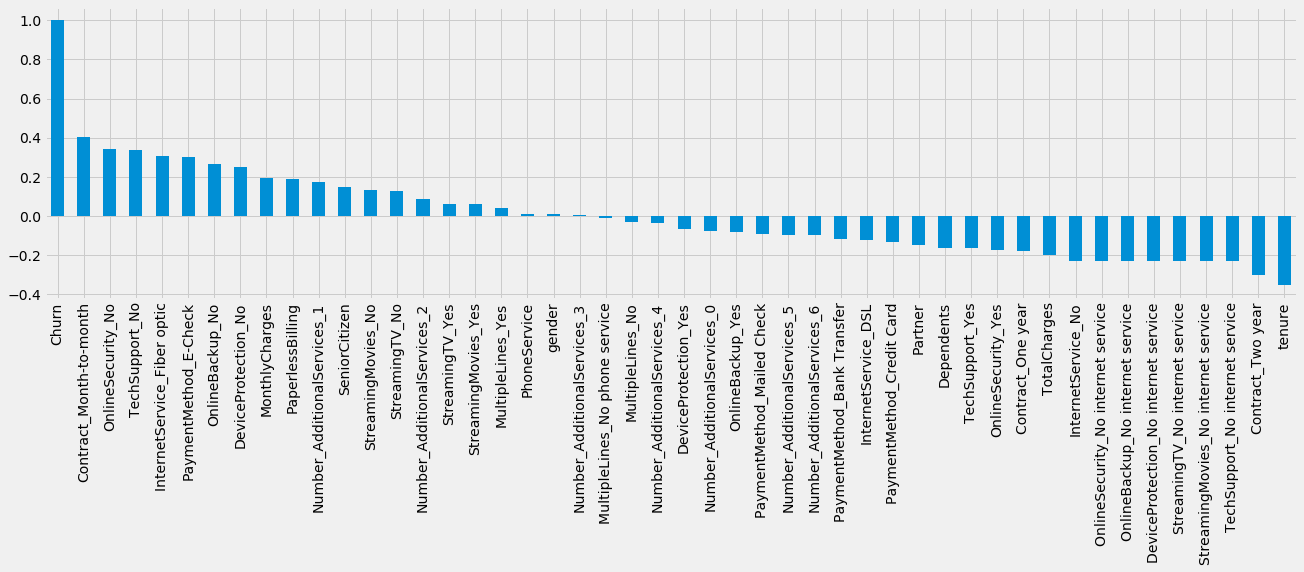

In [57]:
#Show correlation plot for correlation of Churn with each of the remaining features. 
plt.figure(figsize=(16,10)) 
ChurnDatadf.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5)) 